In [36]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [37]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [38]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

21 30
wvfrm = 
l =  0  SNR =  10.054924953870701  m1 =  21  m2 =  30


13 28
wvfrm = 
l =  1  SNR =  11.68287710826185  m1 =  13  m2 =  28
29 28
wvfrm = 
l =  2  SNR =  12.446892899721666  m1 =  29  m2 =  28
14 24
wvfrm = 
l =  3  SNR =  19.953739732544054  m1 =  14  m2 =  24
23 13
wvfrm = 
l =  4  SNR =  17.348495965663716  m1 =  23  m2 =  13
16 17
wvfrm = 
l =  5  SNR =  7.667983611270079  m1 =  16  m2 =  17
19 14
wvfrm = 
l =  6  SNR =  9.034674415769134  m1 =  19  m2 =  14
17 21
wvfrm = 
l =  7  SNR =  18.275505722032282  m1 =  17  m2 =  21
17 25
wvfrm = 
l =  8  SNR =  9.788292428884224  m1 =  17  m2 =  25
20 22
wvfrm = 
l =  9  SNR =  12.58885509658169  m1 =  20  m2 =  22
28 18
wvfrm = 
l =  10  SNR =  18.234184343403115  m1 =  28  m2 =  18
24 11
wvfrm = 
l =  11  SNR =  32.03591523534489  m1 =  24  m2 =  11
18 21
wvfrm = 
l =  12  SNR =  13.73462616912543  m1 =  18  m2 =  21
28 28
wvfrm = 
l =  13  SNR =  15.936529627496402  m1 =  28  m2 =  28
13 28
wvfrm = 
l =  14  SNR =  9.784661396848012  m1 =  13  m2 =  28
15 28
wvfrm = 
l =  15  SNR =  8.0770

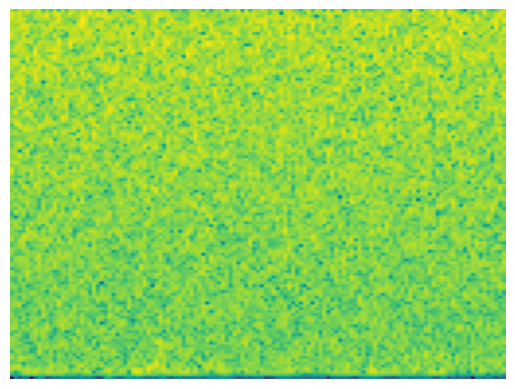

In [39]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:
    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)

    plt.savefig(
        f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
        bbox_inches="tight",
        pad_inches=0,
    )
    l += 1

In [40]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 26
wvfrm = 
l =  100  SNR =  41.946086781540885  m1 =  30  m2 =  26
27 21
wvfrm = 
l =  100  SNR =  21.682064177832242  m1 =  27  m2 =  21
27 28
wvfrm = 
l =  100  SNR =  61.80629265250295  m1 =  27  m2 =  28
28 25
wvfrm = 
l =  100  SNR =  16.59186082854568  m1 =  28  m2 =  25
18 25
wvfrm = 
l =  101  SNR =  9.404742799028863  m1 =  18  m2 =  25
18 11
wvfrm = 
l =  102  SNR =  33.5837066453833  m1 =  18  m2 =  11
10 17
wvfrm = 
l =  102  SNR =  9.731632796342437  m1 =  10  m2 =  17
27 25
wvfrm = 
l =  103  SNR =  22.998099584890067  m1 =  27  m2 =  25
28 10
wvfrm = 
l =  103  SNR =  23.60544897014352  m1 =  28  m2 =  10
11 19
wvfrm = 
l =  103  SNR =  10.158804358175063  m1 =  11  m2 =  19
17 26
wvfrm = 
l =  104  SNR =  12.067581476528405  m1 =  17  m2 =  26
14 24
wvfrm = 
l =  105  SNR =  18.132368025889576  m1 =  14  m2 =  24
20 23
wvfrm = 
l =  106  SNR =  17.15249813614175  m1 =  20  m2 =  23
24 24
wvfrm = 
l =  107  SNR =  10.298231569644754  m1 =  24  m2 =  24
14 23
wvfrm = 

20 19
wvfrm = 
l =  200  SNR =  11.072216371797268  m1 =  20  m2 =  19
30 11
wvfrm = 
l =  201  SNR =  10.487407079646323  m1 =  30  m2 =  11
11 17
wvfrm = 
l =  202  SNR =  9.248963291908343  m1 =  11  m2 =  17
18 19
wvfrm = 
l =  203  SNR =  6.764436192557938  m1 =  18  m2 =  19
21 22
wvfrm = 
l =  204  SNR =  16.49005099038847  m1 =  21  m2 =  22
26 13
wvfrm = 
l =  205  SNR =  11.299210091344493  m1 =  26  m2 =  13
26 21
wvfrm = 
l =  206  SNR =  15.646086598627779  m1 =  26  m2 =  21
19 16
wvfrm = 
l =  207  SNR =  12.989278596445155  m1 =  19  m2 =  16
26 17
wvfrm = 
l =  208  SNR =  13.805415169093905  m1 =  26  m2 =  17
23 21
wvfrm = 
l =  209  SNR =  15.15185626794276  m1 =  23  m2 =  21
13 27
wvfrm = 
l =  210  SNR =  11.771508352347938  m1 =  13  m2 =  27
22 24
wvfrm = 
l =  211  SNR =  10.728760587360329  m1 =  22  m2 =  24
27 12
wvfrm = 
l =  212  SNR =  8.925114594961478  m1 =  27  m2 =  12
12 27
wvfrm = 
l =  213  SNR =  8.252188420506153  m1 =  12  m2 =  27
22 23
wvfrm 

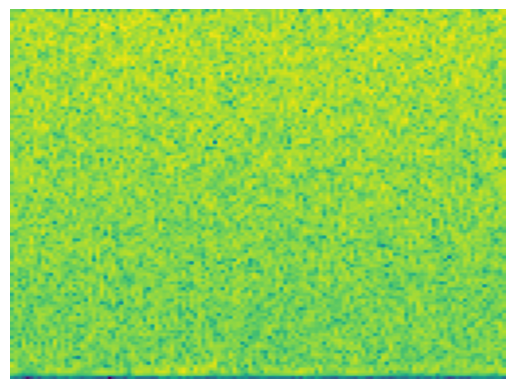

In [ ]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 16
wvfrm = 
l =  300  SNR =  9.103489638420022  m1 =  20  m2 =  16
29 19
wvfrm = 
l =  301  SNR =  10.456631833234722  m1 =  29  m2 =  19
20 27
wvfrm = 
l =  302  SNR =  11.944757737855067  m1 =  20  m2 =  27
16 21
wvfrm = 
l =  303  SNR =  14.139856089868259  m1 =  16  m2 =  21
21 18
wvfrm = 
l =  304  SNR =  9.529529822777409  m1 =  21  m2 =  18
30 21
wvfrm = 
l =  305  SNR =  15.007647753718638  m1 =  30  m2 =  21
25 28
wvfrm = 
l =  306  SNR =  12.718018735531958  m1 =  25  m2 =  28
14 25
wvfrm = 
l =  307  SNR =  11.594471224664517  m1 =  14  m2 =  25
20 16
wvfrm = 
l =  308  SNR =  10.195282411699004  m1 =  20  m2 =  16
16 10
wvfrm = 
l =  309  SNR =  9.064928593427076  m1 =  16  m2 =  10
25 15
wvfrm = 
l =  310  SNR =  10.925088547618026  m1 =  25  m2 =  15
28 16
wvfrm = 
l =  311  SNR =  11.828004398908979  m1 =  28  m2 =  16
18 11
wvfrm = 
l =  312  SNR =  10.003554021438557  m1 =  18  m2 =  11
15 19
wvfrm = 
l =  313  SNR =  9.462286002642694  m1 =  15  m2 =  19
13 18
wvfr

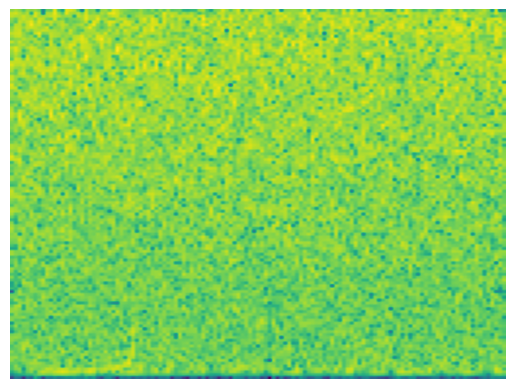

In [ ]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 17
wvfrm = 
l =  400  SNR =  11.272483238115502  m1 =  19  m2 =  17
28 15
wvfrm = 
l =  401  SNR =  13.358687758281075  m1 =  28  m2 =  15
13 20
wvfrm = 
l =  402  SNR =  8.897932200144817  m1 =  13  m2 =  20
22 21
wvfrm = 
l =  403  SNR =  15.108511509827423  m1 =  22  m2 =  21
17 10
wvfrm = 
l =  404  SNR =  8.938275161753285  m1 =  17  m2 =  10
29 20
wvfrm = 
l =  405  SNR =  15.723610902158741  m1 =  29  m2 =  20
10 24
wvfrm = 
l =  406  SNR =  8.059159190440363  m1 =  10  m2 =  24
27 23
wvfrm = 
l =  407  SNR =  15.777752012241812  m1 =  27  m2 =  23
10 12
wvfrm = 
l =  408  SNR =  7.549638724558751  m1 =  10  m2 =  12
13 12
wvfrm = 
l =  409  SNR =  10.139733919463575  m1 =  13  m2 =  12
19 11
wvfrm = 
l =  410  SNR =  9.152153798202786  m1 =  19  m2 =  11
26 16
wvfrm = 
l =  411  SNR =  11.344084076583442  m1 =  26  m2 =  16
11 29
wvfrm = 
l =  412  SNR =  7.191714249482873  m1 =  11  m2 =  29
29 26
wvfrm = 
l =  413  SNR =  14.531131617293415  m1 =  29  m2 =  26
26 16
wvfrm 

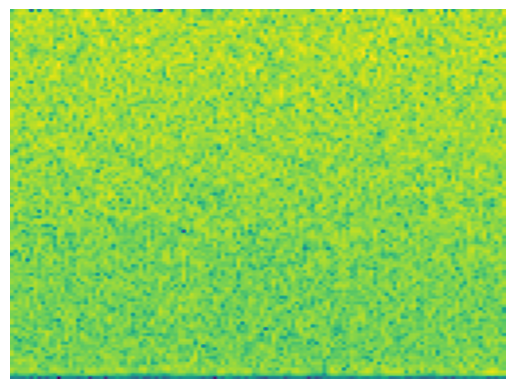

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 22
wvfrm = 
l =  500  SNR =  16.139559986451964  m1 =  29  m2 =  22
25 12
wvfrm = 
l =  501  SNR =  12.768334312188191  m1 =  25  m2 =  12
16 23
wvfrm = 
l =  502  SNR =  11.216771609731566  m1 =  16  m2 =  23
18 13
wvfrm = 
l =  503  SNR =  8.896316390187375  m1 =  18  m2 =  13
21 25
wvfrm = 
l =  504  SNR =  14.699755925099705  m1 =  21  m2 =  25
14 15
wvfrm = 
l =  505  SNR =  8.084116837481925  m1 =  14  m2 =  15
19 23
wvfrm = 
l =  506  SNR =  10.224432989545202  m1 =  19  m2 =  23
12 11
wvfrm = 
l =  507  SNR =  7.74433386568441  m1 =  12  m2 =  11
22 17
wvfrm = 
l =  508  SNR =  10.617345758566946  m1 =  22  m2 =  17
10 21
wvfrm = 
l =  509  SNR =  8.16903260867705  m1 =  10  m2 =  21
28 30
wvfrm = 
l =  510  SNR =  16.188985386065365  m1 =  28  m2 =  30
10 20
wvfrm = 
l =  511  SNR =  8.55742125044317  m1 =  10  m2 =  20
22 10
wvfrm = 
l =  512  SNR =  8.988634654744448  m1 =  22  m2 =  10
26 25
wvfrm = 
l =  513  SNR =  11.139208035105073  m1 =  26  m2 =  25
27 12
wvfrm = 


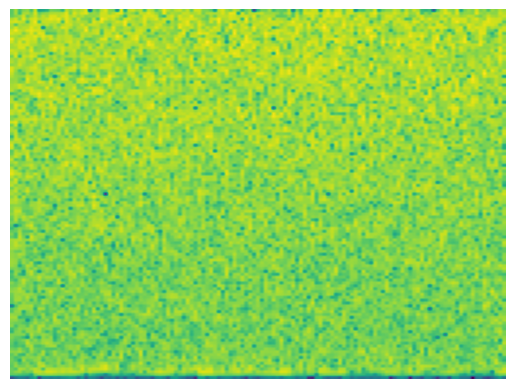

In [ ]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 17
wvfrm = 
l =  600  SNR =  11.066785117541572  m1 =  20  m2 =  17
22 11
wvfrm = 
l =  601  SNR =  10.635966329672597  m1 =  22  m2 =  11
10 19
wvfrm = 
l =  602  SNR =  5.5133433479196245  m1 =  10  m2 =  19
26 18
wvfrm = 
l =  603  SNR =  11.015981654164028  m1 =  26  m2 =  18
22 24
wvfrm = 
l =  604  SNR =  15.691892681300697  m1 =  22  m2 =  24
23 17
wvfrm = 
l =  605  SNR =  14.190322246061777  m1 =  23  m2 =  17
24 26
wvfrm = 
l =  606  SNR =  14.052847436878286  m1 =  24  m2 =  26
20 10
wvfrm = 
l =  607  SNR =  9.99962304146236  m1 =  20  m2 =  10
14 23
wvfrm = 
l =  608  SNR =  12.36425682114425  m1 =  14  m2 =  23
16 21
wvfrm = 
l =  609  SNR =  10.768766060771785  m1 =  16  m2 =  21
10 29
wvfrm = 
l =  610  SNR =  12.625035466184805  m1 =  10  m2 =  29
12 14
wvfrm = 
l =  611  SNR =  9.541483644449682  m1 =  12  m2 =  14
27 15
wvfrm = 
l =  612  SNR =  13.446431200594581  m1 =  27  m2 =  15
14 10
wvfrm = 
l =  613  SNR =  8.952575091939577  m1 =  14  m2 =  10
18 16
wvfrm

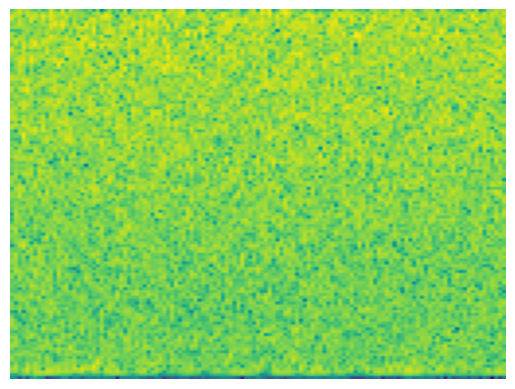

In [ ]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 12
wvfrm = 
l =  700  SNR =  5.59868970572979  m1 =  21  m2 =  12
28 28
wvfrm = 
l =  701  SNR =  11.106525558623462  m1 =  28  m2 =  28
16 26
wvfrm = 
l =  702  SNR =  9.96139086381485  m1 =  16  m2 =  26
13 20
wvfrm = 
l =  703  SNR =  8.097710240439152  m1 =  13  m2 =  20
19 22
wvfrm = 
l =  704  SNR =  13.439799406800905  m1 =  19  m2 =  22
23 20
wvfrm = 
l =  705  SNR =  13.957803274362433  m1 =  23  m2 =  20
22 12
wvfrm = 
l =  706  SNR =  11.01897706536887  m1 =  22  m2 =  12
17 17
wvfrm = 
l =  707  SNR =  13.26083338508441  m1 =  17  m2 =  17
27 30
wvfrm = 
l =  708  SNR =  12.962059175755336  m1 =  27  m2 =  30
16 21
wvfrm = 
l =  709  SNR =  11.523196628110844  m1 =  16  m2 =  21
27 20
wvfrm = 
l =  710  SNR =  10.846153303838575  m1 =  27  m2 =  20
17 29
wvfrm = 
l =  711  SNR =  10.69669493296358  m1 =  17  m2 =  29
30 30
wvfrm = 
l =  712  SNR =  13.00350946910377  m1 =  30  m2 =  30
16 15
wvfrm = 
l =  713  SNR =  10.183670359723493  m1 =  16  m2 =  15
15 15
wvfrm = 


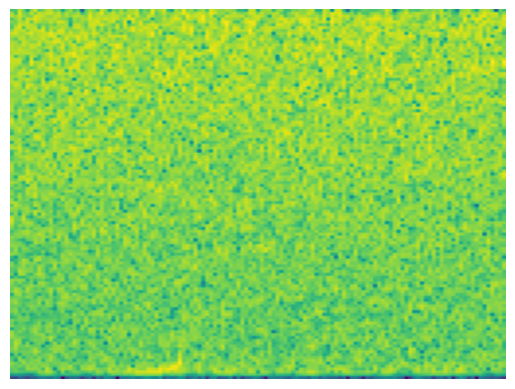

In [ ]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 24
wvfrm = 
l =  800  SNR =  11.496893176029706  m1 =  17  m2 =  24
10 30
wvfrm = 
l =  801  SNR =  11.753807763280177  m1 =  10  m2 =  30
26 29
wvfrm = 
l =  802  SNR =  14.660750339907587  m1 =  26  m2 =  29
17 12
wvfrm = 
l =  803  SNR =  7.700629472544017  m1 =  17  m2 =  12
28 20
wvfrm = 
l =  804  SNR =  10.66093890366007  m1 =  28  m2 =  20
16 28
wvfrm = 
l =  805  SNR =  10.555397185215035  m1 =  16  m2 =  28
16 16
wvfrm = 
l =  806  SNR =  8.720931530435701  m1 =  16  m2 =  16
26 26
wvfrm = 
l =  807  SNR =  12.97930684254748  m1 =  26  m2 =  26
24 28
wvfrm = 
l =  808  SNR =  16.81042624656407  m1 =  24  m2 =  28
20 12
wvfrm = 
l =  809  SNR =  12.426301218719514  m1 =  20  m2 =  12
13 25
wvfrm = 
l =  810  SNR =  8.673212014154775  m1 =  13  m2 =  25
11 24
wvfrm = 
l =  811  SNR =  8.495442510356334  m1 =  11  m2 =  24
17 18
wvfrm = 
l =  812  SNR =  8.301970196289442  m1 =  17  m2 =  18
16 25
wvfrm = 
l =  813  SNR =  9.346722099659813  m1 =  16  m2 =  25
29 27
wvfrm = 


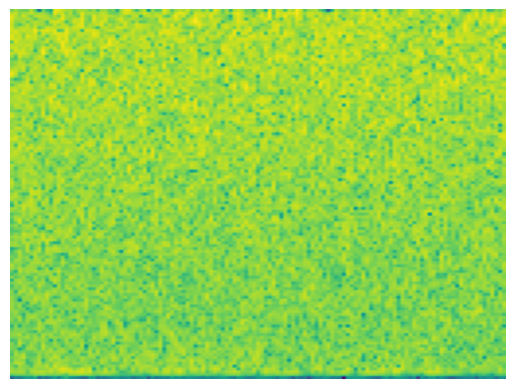

In [ ]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

27 26
wvfrm = 
l =  900  SNR =  15.7458968852057  m1 =  27  m2 =  26
18 29
wvfrm = 
l =  901  SNR =  12.70776995322046  m1 =  18  m2 =  29
28 24
wvfrm = 
l =  902  SNR =  15.961363896162874  m1 =  28  m2 =  24
23 19
wvfrm = 
l =  903  SNR =  10.523213448159902  m1 =  23  m2 =  19
10 28
wvfrm = 
l =  904  SNR =  10.480274977850513  m1 =  10  m2 =  28
29 14
wvfrm = 
l =  905  SNR =  7.727395188617687  m1 =  29  m2 =  14
19 30
wvfrm = 
l =  906  SNR =  15.295434221695782  m1 =  19  m2 =  30
26 17
wvfrm = 
l =  907  SNR =  13.962521698948422  m1 =  26  m2 =  17
10 29
wvfrm = 
l =  908  SNR =  9.858397402010414  m1 =  10  m2 =  29
20 29
wvfrm = 
l =  909  SNR =  13.822758749347264  m1 =  20  m2 =  29
13 11
wvfrm = 
l =  910  SNR =  9.612489728356305  m1 =  13  m2 =  11
23 29
wvfrm = 
l =  911  SNR =  16.588435849401975  m1 =  23  m2 =  29
16 18
wvfrm = 
l =  912  SNR =  8.24035336671673  m1 =  16  m2 =  18
12 20
wvfrm = 
l =  913  SNR =  6.953402374813889  m1 =  12  m2 =  20
24 11
wvfrm = 


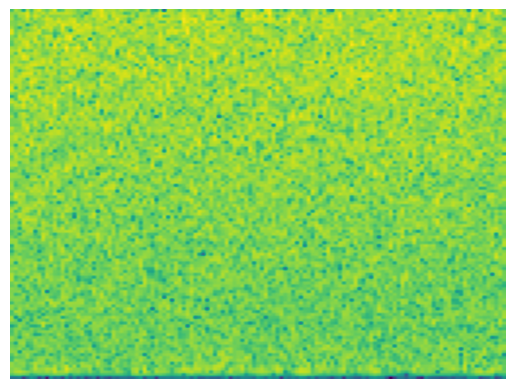

In [ ]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

22 18
wvfrm = 
l =  1000  SNR =  8.049977250540534  m1 =  22  m2 =  18
11 14
wvfrm = 
l =  1001  SNR =  7.534239455127992  m1 =  11  m2 =  14
16 27
wvfrm = 
l =  1002  SNR =  13.067922801425082  m1 =  16  m2 =  27
23 14
wvfrm = 
l =  1003  SNR =  9.51531525530513  m1 =  23  m2 =  14
10 15
wvfrm = 
l =  1004  SNR =  7.547210882863632  m1 =  10  m2 =  15
24 25
wvfrm = 
l =  1005  SNR =  13.171623660637145  m1 =  24  m2 =  25
21 28
wvfrm = 
l =  1006  SNR =  12.879190919920847  m1 =  21  m2 =  28
22 15
wvfrm = 
l =  1007  SNR =  12.077854215746642  m1 =  22  m2 =  15
11 28
wvfrm = 
l =  1008  SNR =  9.441111201275067  m1 =  11  m2 =  28
30 23
wvfrm = 
l =  1009  SNR =  14.102361293665052  m1 =  30  m2 =  23
26 28
wvfrm = 
l =  1010  SNR =  11.739007603986687  m1 =  26  m2 =  28
11 22
wvfrm = 
l =  1011  SNR =  10.05835013260843  m1 =  11  m2 =  22
20 27
wvfrm = 
l =  1012  SNR =  9.460911775599014  m1 =  20  m2 =  27
26 22
wvfrm = 
l =  1013  SNR =  14.060993508502195  m1 =  26  m2 =  22


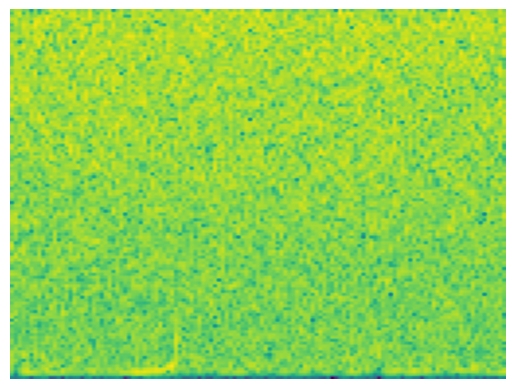

In [ ]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 27
wvfrm = 
l =  1100  SNR =  12.464623730239166  m1 =  25  m2 =  27
12 25
wvfrm = 
l =  1101  SNR =  12.2626813166043  m1 =  12  m2 =  25
26 19
wvfrm = 
l =  1102  SNR =  11.19093816578985  m1 =  26  m2 =  19
29 15
wvfrm = 
l =  1103  SNR =  12.32432995154933  m1 =  29  m2 =  15
13 12
wvfrm = 
l =  1104  SNR =  7.7122377238173785  m1 =  13  m2 =  12
17 10
wvfrm = 
l =  1105  SNR =  9.483288324205832  m1 =  17  m2 =  10
24 22
wvfrm = 
l =  1106  SNR =  11.652227293320665  m1 =  24  m2 =  22
28 23
wvfrm = 
l =  1107  SNR =  14.665007544424983  m1 =  28  m2 =  23
10 19
wvfrm = 
l =  1108  SNR =  5.287707117035376  m1 =  10  m2 =  19
24 20
wvfrm = 
l =  1109  SNR =  9.69778846049228  m1 =  24  m2 =  20
26 11
wvfrm = 
l =  1110  SNR =  7.352036206335126  m1 =  26  m2 =  11
25 13
wvfrm = 
l =  1111  SNR =  10.203732716060198  m1 =  25  m2 =  13
16 20
wvfrm = 
l =  1112  SNR =  8.470831443390844  m1 =  16  m2 =  20
21 20
wvfrm = 
l =  1113  SNR =  11.458078994778651  m1 =  21  m2 =  20
11

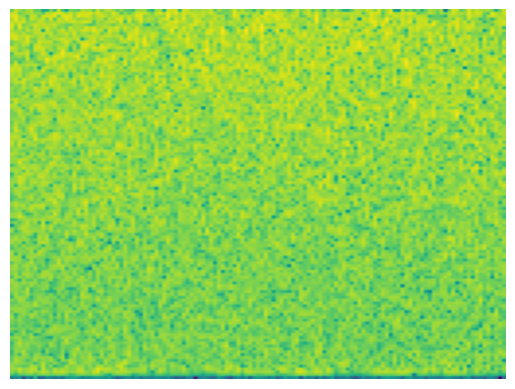

In [ ]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 11
wvfrm = 
l =  1200  SNR =  9.271336865489213  m1 =  14  m2 =  11
29 12
wvfrm = 
l =  1201  SNR =  10.134660552887986  m1 =  29  m2 =  12
18 25
wvfrm = 
l =  1202  SNR =  16.61797300843786  m1 =  18  m2 =  25
23 20
wvfrm = 
l =  1203  SNR =  9.593392178107623  m1 =  23  m2 =  20
11 12
wvfrm = 
l =  1204  SNR =  7.927685985410514  m1 =  11  m2 =  12
19 30
wvfrm = 
l =  1205  SNR =  10.551094899037478  m1 =  19  m2 =  30
19 13
wvfrm = 
l =  1206  SNR =  11.633108591024433  m1 =  19  m2 =  13
25 12
wvfrm = 
l =  1207  SNR =  9.726554317580879  m1 =  25  m2 =  12
25 15
wvfrm = 
l =  1208  SNR =  8.107074161882359  m1 =  25  m2 =  15
12 11
wvfrm = 
l =  1209  SNR =  5.680690576679149  m1 =  12  m2 =  11
19 13
wvfrm = 
l =  1210  SNR =  12.195978921448651  m1 =  19  m2 =  13
21 25
wvfrm = 
l =  1211  SNR =  13.585190500476243  m1 =  21  m2 =  25
16 25
wvfrm = 
l =  1212  SNR =  9.85991520438525  m1 =  16  m2 =  25
14 11
wvfrm = 
l =  1213  SNR =  7.940114240682632  m1 =  14  m2 =  11
29

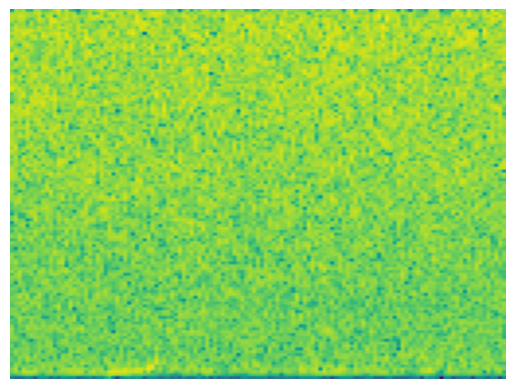

In [ ]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 15
wvfrm = 
l =  1300  SNR =  8.28678887041247  m1 =  10  m2 =  15
13 14
wvfrm = 
l =  1301  SNR =  7.088006255406699  m1 =  13  m2 =  14
26 14
wvfrm = 
l =  1302  SNR =  9.528532184945021  m1 =  26  m2 =  14
13 19
wvfrm = 
l =  1303  SNR =  7.957929651178412  m1 =  13  m2 =  19
14 14
wvfrm = 
l =  1304  SNR =  7.103205816628347  m1 =  14  m2 =  14
23 11
wvfrm = 
l =  1305  SNR =  12.258079308130403  m1 =  23  m2 =  11
19 18
wvfrm = 
l =  1306  SNR =  12.713754419196531  m1 =  19  m2 =  18
28 29
wvfrm = 
l =  1307  SNR =  16.51387906114426  m1 =  28  m2 =  29
15 28
wvfrm = 
l =  1308  SNR =  9.119935988930127  m1 =  15  m2 =  28
22 29
wvfrm = 
l =  1309  SNR =  14.566303231231277  m1 =  22  m2 =  29
10 17
wvfrm = 
l =  1310  SNR =  8.83178838204665  m1 =  10  m2 =  17
27 28
wvfrm = 
l =  1311  SNR =  11.712099202632059  m1 =  27  m2 =  28
19 19
wvfrm = 
l =  1312  SNR =  9.004792860203626  m1 =  19  m2 =  19
30 23
wvfrm = 
l =  1313  SNR =  15.85794061876357  m1 =  30  m2 =  23
23 3

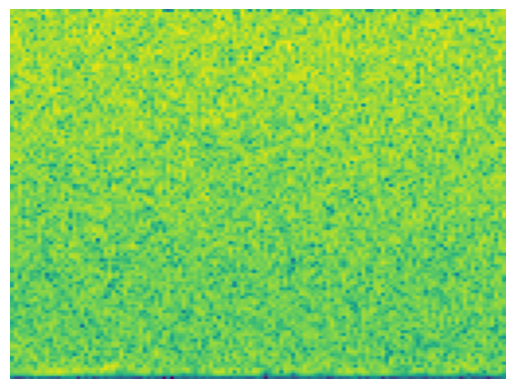

In [ ]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

26 20
wvfrm = 
l =  1400  SNR =  14.046746736832878  m1 =  26  m2 =  20
13 17
wvfrm = 
l =  1401  SNR =  7.5686414341007495  m1 =  13  m2 =  17
10 25
wvfrm = 
l =  1402  SNR =  7.650215208904012  m1 =  10  m2 =  25
29 24
wvfrm = 
l =  1403  SNR =  15.862243517832926  m1 =  29  m2 =  24
19 17
wvfrm = 
l =  1404  SNR =  14.251078398193263  m1 =  19  m2 =  17
19 17
wvfrm = 
l =  1405  SNR =  13.159825046841268  m1 =  19  m2 =  17
11 27
wvfrm = 
l =  1406  SNR =  9.831380788726312  m1 =  11  m2 =  27
20 28
wvfrm = 
l =  1407  SNR =  12.384885272354834  m1 =  20  m2 =  28
17 29
wvfrm = 
l =  1408  SNR =  12.852114275040703  m1 =  17  m2 =  29
30 23
wvfrm = 
l =  1409  SNR =  12.16674702250377  m1 =  30  m2 =  23
26 21
wvfrm = 
l =  1410  SNR =  14.155056406522357  m1 =  26  m2 =  21
21 17
wvfrm = 
l =  1411  SNR =  11.609043257841307  m1 =  21  m2 =  17
17 25
wvfrm = 
l =  1412  SNR =  10.493311376812812  m1 =  17  m2 =  25
30 16
wvfrm = 
l =  1413  SNR =  9.544340083602362  m1 =  30  m2 = 

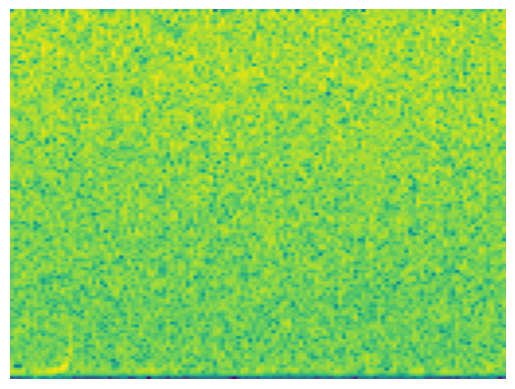

In [ ]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
